## Predicting Newsletter Subscription from Player Characteristics on a Minecraft Research Server

### Introduction

**Background**: Players on the Minecraft research server vary in their engagement and demographic profiles. Two important factors that might influence whether a player subscribes to the game-related newsletter are the total hours they have spent playing (played_hours) and their age (Age). 
Investigating how these two variables relate to subscription can
can help the team with recruiting players.

**Question**: Can total hours played (played_hours) and player age (Age) predict whether a player subscribes (subscribe) to the game-related newsletter?


**Data description**:  The dataset used for this analysis is contained in the file players.csv, which includes detailed information about individual players on the Minecraft research server.
- **File**: players.csv
- **Number of observations**: 196 players
- **Number of variables**:7
- **Data source**: Player activity and survey data collected by the UBC Computer Science research group studying video game behavior and newsletter subscription.

| Variable       | Type        | Description                                                   |
|----------------|------------|---------------------------------------------------------------|
| `experience`   | Categorical | Player experience level (e.g., "Pro", "Veteran", "Amateur", "Beginner", "Regular") |
| `subscribe`    | Boolean     | Whether the player subscribed to the game-related newsletter (`TRUE` or `FALSE`)        |
| `hashedEmail`  | String      |  player identifier (hashed email address)             |
| `played_hours` | Numeric     | Total number of hours the player has played on the server                   |
| `name`         | String      | Player’s  name                              |
| `gender`       | Categorical | Player’s self-reported gender identity (e.g., Male, Female)          |
| `Age`          | Numeric     | Age of the player in years            |



## Methods and results

First, we load the libraries and set the height and width of the graphs

In [10]:
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)

options(repr.plot.width=12,repr.plot.height=6)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



In [11]:
players=read_csv("players.csv")
players


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


We then clean the dataset to remove irrelevant rows and convert variables to the appropriate types.

In [13]:
# Drop rows with missing Age or played_hours
players_clean <- players|>
  filter(!is.na(Age), !is.na(played_hours))

# Convert subscribe to factor (response variable)
players_clean <- players_clean|>
  mutate(subscribe = as.factor(subscribe))


We focused on two predictors; age and played_hours, and the response variable; subscribe. Hence, we will summarize these variables.

In [ ]:
players_clean <- players_clean|>
  select(subscribe, Age, played_hours)


To explore whether our chosen explanatory variables (Age and played_hours) are useful predictors of the response variable (subscribe), we will create histogram plots that show how each variable relates to subscription status.

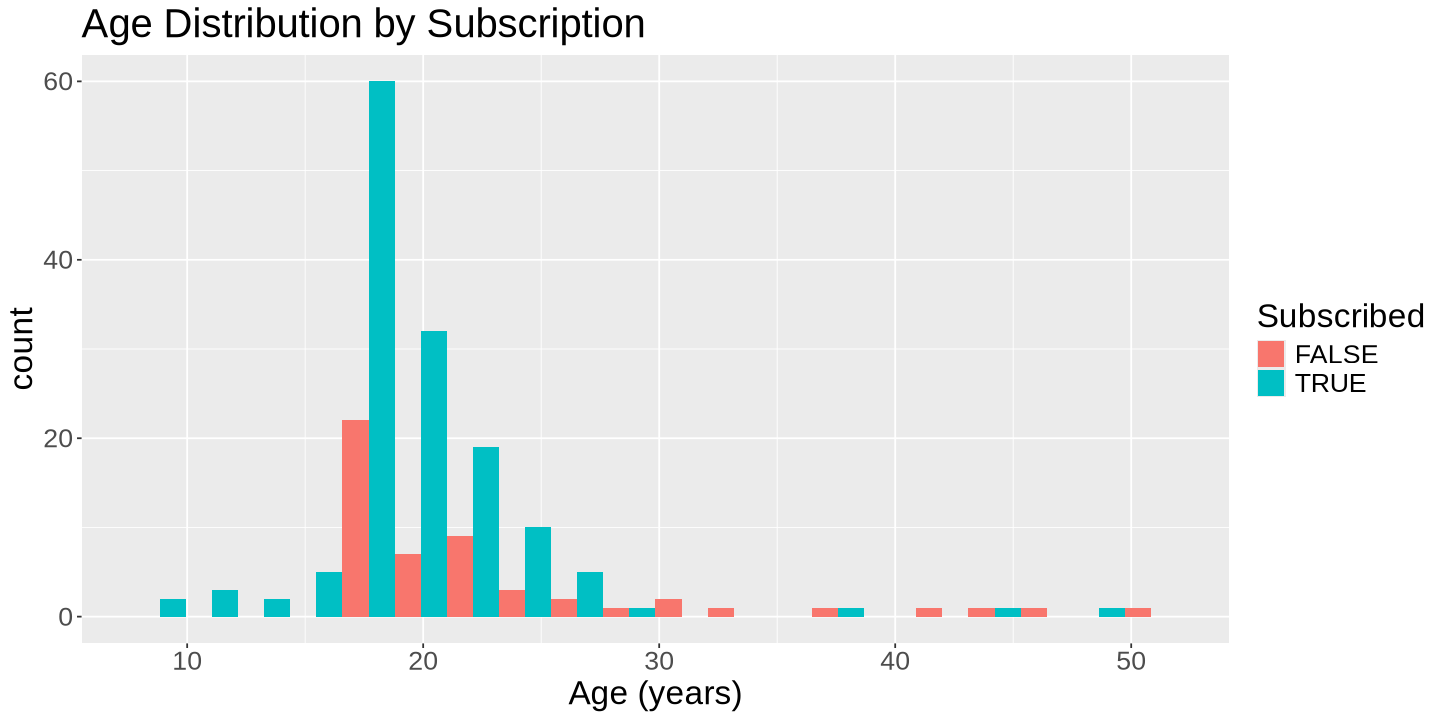

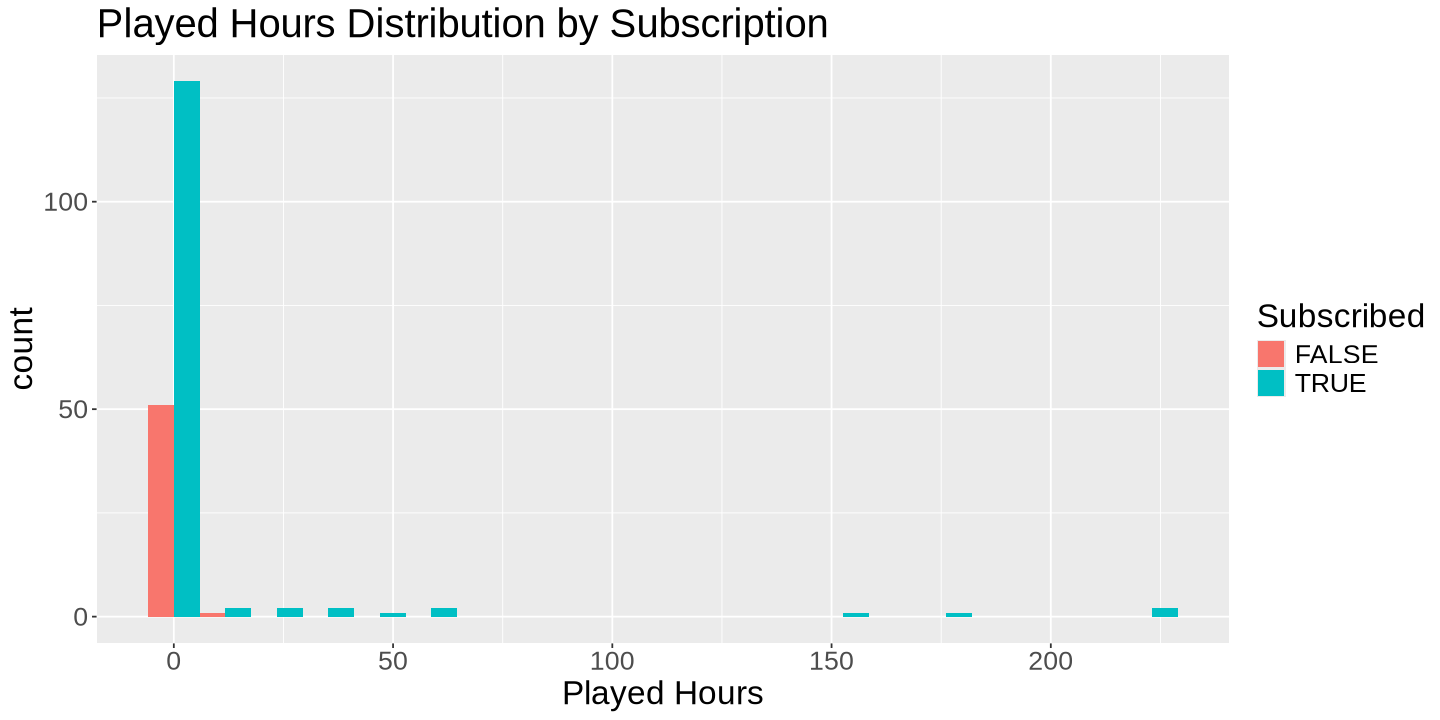

In [24]:
# Histogram of Age
players_clean|>
  ggplot(aes(x = Age, fill = subscribe)) +
  geom_histogram(bins = 20, position = "dodge") +
  labs(title = "Age Distribution by Subscription", x = "Age (years)", fill = "Subscribed")+
theme(text=element_text(size=20))
  

# Histogram of Played Hours
players_clean|>
  ggplot(aes(x = played_hours, fill = subscribe)) +
  geom_histogram(bins = 20, position = "dodge") +
  labs(title = "Played Hours Distribution by Subscription", x = "Played Hours", fill = "Subscribed")+
theme(text=element_text(size=20))
 


While neither variable shows a perfectly clear or strong visual correlation with the subscription status, both Age and Played Hours show enough variation across subscription groups to justify using them as predictors in a classification model like KNN.